In [206]:
# Brendan Dasilva
# 101447806
# Assignment 2

In [208]:
# PART A

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [4]:
# Step 1 - Gather and clean the data

feature_names = ["Temperature", "Wind", "Rain"]
target_names = ["Cancel", "Play"]

tennis_data = np.array([
    [30, 0, 0, 1],  # Hot -------- No Wind -- No Rain --> Play
    [22, 1, 0, 1],  # Moderate --- Windy ---- No Rain --> Play
    [15, 0, 1, 0],  # Cool ------- No Wind -- Rainy ----> Cancel
    [35, 1, 0, 1],  # Hot -------- Windy ---- No Rain --> Play
    [5, 0, 1, 0],   # Very Cold -- No Wind -- Rainy ----> Cancel
    [10, 1, 1, 0],  # Cold ------- Windy ---- Rainy ----> Cancel
    [25, 0, 0, 1],  # Warm ------- No Wind -- No Rain --> Play
    [18, 1, 1, 0],  # Moderate --- Windy ---- Rainy ----> Cancel
    [28, 1, 0, 1],  # Warm ------- Windy ---- No Rain --> Play
    [32, 0, 0, 1],  # Hot -------- No Wind -- No Rain --> Play
    [15, 1, 0, 0],  # Cool ------- Windy ---- No Rain --> Cancel
    [20, 1, 0, 1],  # Moderate --- Windy ---- No Rain --> Play
    [8, 0, 1, 0],   # Very Cold -- No Wind -- Rainy ----> Cancel
    [23, 0, 0, 1],  # Warm ------- No Wind -- No Rain --> Play
    [17, 0, 1, 0],  # Cool ------- No Wind -- Rainy ----> Cancel
    [12, 1, 0, 0],  # Cold ------- Windy ---- No Rain --> Cancel
    [27, 1, 0, 1],  # Warm ------- Windy ---- No Rain --> Play
    [30, 0, 1, 0],  # Hot -------- No Wind -- Rainy ----> Cancel
    [11, 1, 1, 0],  # Cold ------- Windy ---- Rainy ----> Cancel
    [22, 0, 0, 1],  # Moderate --- No Wind -- No Rain --> Play
    [28, 0, 1, 0],  # Warm ------- No Wind -- Rainy ----> Cancel
    [24, 1, 0, 1],  # Warm ------- Windy ---- No Rain --> Play
    [9,  1, 1, 0],  # Cold ------- Windy ---- Rainy ----> Cancel
    [25, 0, 1, 0],  # Warm ------- No Wind -- Rainy ----> Cancel
    [29, 1, 0, 1],  # Hot -------- Windy ---- No Rain --> Play
    [15, 0, 1, 0],  # Cool ------- No Wind -- Rainy ----> Cancel
    [22, 1, 1, 0],  # Moderate --- Windy ---- Rainy ----> Cancel
    [10, 1, 0, 0],  # Cold ------- Windy ---- No Rain --> Cancel
    [30, 0, 0, 1],  # Hot -------- No Wind -- No Rain --> Play
    [23, 0, 1, 0],  # Warm ------- No Wind -- Rainy ----> Cancel
    [21, 1, 0, 1],  # Moderate --- Windy ---- No Rain --> Play
    [12, 0, 1, 0],  # Cold ------- No Wind -- Rainy ----> Cancel
    [27, 1, 1, 0],  # Warm ------- Windy ---- Rainy ----> Cancel
    [33, 0, 0, 1],  # Hot -------- No Wind -- No Rain --> Play
    [8,  1, 1, 0],  # Very Cold -- Windy ---- Rainy ----> Cancel
    [19, 0, 1, 0],  # Moderate --- No Wind -- Rainy ----> Cancel
    [31, 0, 0, 1],  # Hot -------- No Wind -- No Rain --> Play
    [16, 1, 0, 0],  # Cool ------- Windy ---- No Rain --> Cancel
    [11, 0, 1, 0],  # Cold ------- No Wind -- Rainy ----> Cancel
    [32, 1, 0, 1]   # Hot -------- Windy ---- No Rain --> Play
])

# Extract X (features) and y (labels)
X = tennis_data[:, :-1]  # all columns except the last (features)
y = tennis_data[:, -1]   # only the last column (labels)

In [6]:
print("Extracted X (Features):\n", X)
print("\nExtracted y (Labels):\n", y)

Extracted X (Features):
 [[30  0  0]
 [22  1  0]
 [15  0  1]
 [35  1  0]
 [ 5  0  1]
 [10  1  1]
 [25  0  0]
 [18  1  1]
 [28  1  0]
 [32  0  0]
 [15  1  0]
 [20  1  0]
 [ 8  0  1]
 [23  0  0]
 [17  0  1]
 [12  1  0]
 [27  1  0]
 [30  0  1]
 [11  1  1]
 [22  0  0]
 [28  0  1]
 [24  1  0]
 [ 9  1  1]
 [25  0  1]
 [29  1  0]
 [15  0  1]
 [22  1  1]
 [10  1  0]
 [30  0  0]
 [23  0  1]
 [21  1  0]
 [12  0  1]
 [27  1  1]
 [33  0  0]
 [ 8  1  1]
 [19  0  1]
 [31  0  0]
 [16  1  0]
 [11  0  1]
 [32  1  0]]

Extracted y (Labels):
 [1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 1]


In [8]:
# Step 2 - Train the ML alg

# Split dataset into training and test sets
# Used stratify to ensure that both training and testing sets are proportioned in a balanced way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Decision Tree Classifier
tennis_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
tennis_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Step 3 - Test the model with 4 new (unseen) samples
X_new = np.array([
    [24, 0, 0],  # Warm ------ No Wind -- No Rain -> Expect Play (1)
    [9, 1, 1],   # Cold ------ Windy ---- Rainy ---> Expect Cancel (0)
    [20, 0, 1],  # Moderate -- No Wind -- Rainy ---> Expect Cancel (0)
    [19, 1, 0]   # Moderate -- Windy ---- No Rain -> Expect Play (1)
])

y_pred = tennis_model.predict(X_new)
print("Predictions for new samples:", y_pred)

Predictions for new samples: [1 0 0 1]


In [23]:
accuracy = tennis_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [25]:
labels = {0: "Cancel", 1: "Play"}
y_pred_labels = [labels[pred] for pred in y_pred]

for i, prediction in enumerate(y_pred_labels, 1):
    print(f"Sample {i}: {prediction}")

Sample 1: Play
Sample 2: Cancel
Sample 3: Cancel
Sample 4: Play


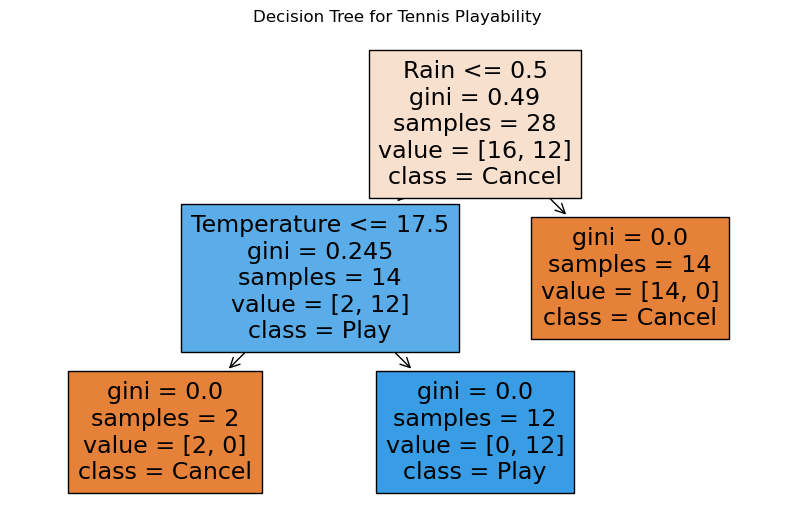

In [238]:
# Step 4 - Visualize the data given by the ML test

plt.figure(figsize=(10, 6))
plot_tree(tennis_model, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree for Tennis Playability\n")
plt.show()